<a href="https://colab.research.google.com/github/hide-squid/high-school-project-1/blob/main/%EC%9E%90%EC%9C%A8%EC%A3%BC%ED%96%89_%EC%9E%90%EB%8F%99%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

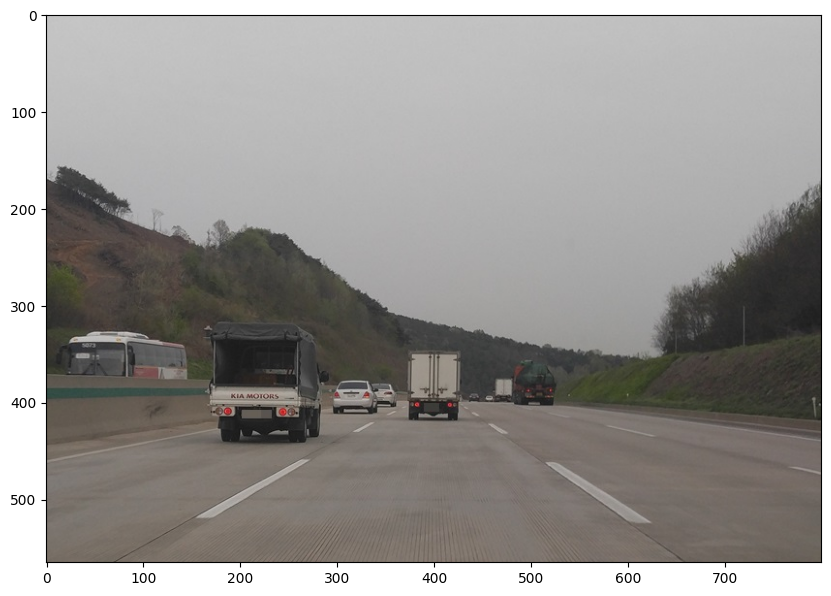

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline

img = mpimg.imread('/content/auto_car.jpeg')

plt.figure(figsize = (10,8))
plt.imshow(img)
plt.show()

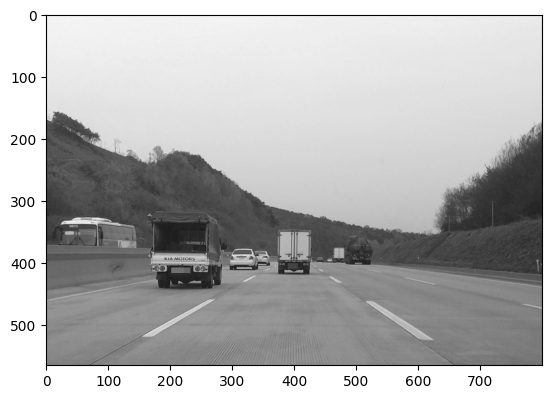

In [ ]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = grayscale(img)

plt.imshow(gray, cmap = 'gray')
plt.show()

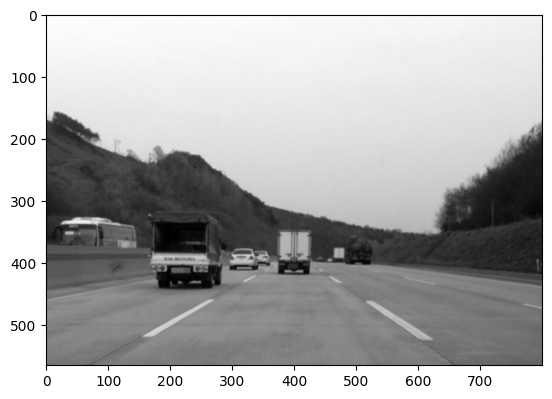

In [ ]:
def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size,kernel_size), 0)

kernel_size = 5
blur_gray = gaussian_blur(gray, kernel_size)

plt.imshow(blur_gray, cmap = 'gray')
plt.show()

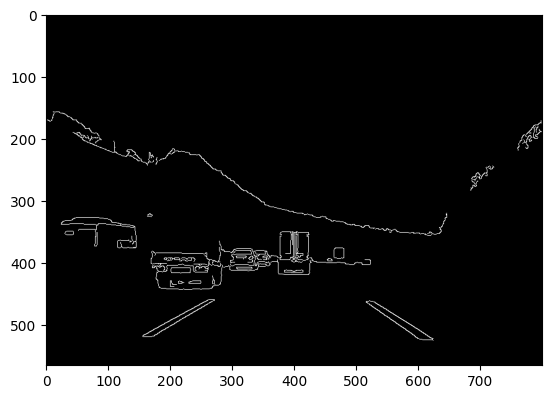

In [ ]:
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img,low_threshold, high_threshold)

low_threshold = 50
high_threshold = 200
edges = canny(blur_gray, low_threshold, high_threshold)

plt.imshow(edges, cmap = 'gray')
plt.show()

In [ ]:
import numpy as np

mask = np.zeros_like(img)

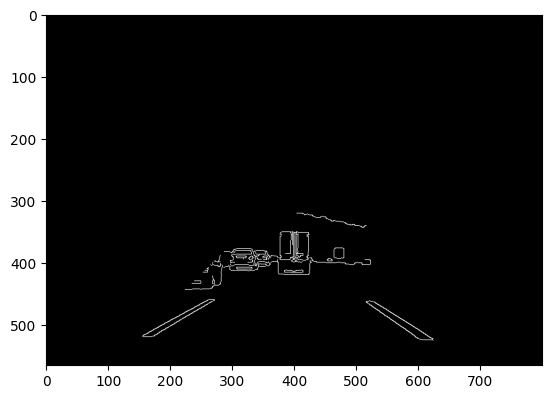

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)

    if len(img.shape)>2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,)
    else:
        ignore_mask_color = 255

    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

imshape = img.shape
vertices = np.array([[(100, imshape[0]),(350, 320), (500, 320), (700, imshape[0])]], dtype=np.int32)
mask = region_of_interest(edges, vertices)
plt.imshow(mask, cmap = 'gray')
plt.show()

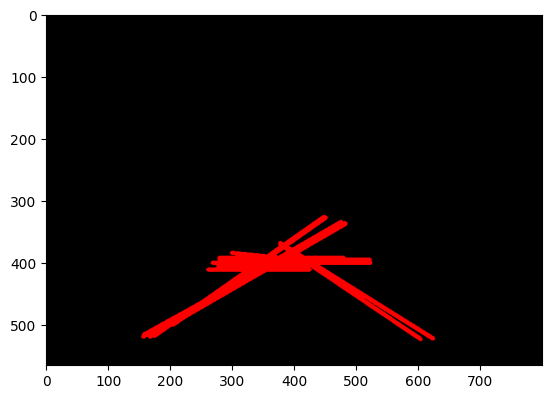

In [ ]:
def draw_lines (img, lines, color=[255, 0, 0], thickness=5):
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
def hough_lines (img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape [1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img
rho = 2
theta = np.pi/180
threshold = 90
min_line_len = 120
max_line_gap = 150

lines = hough_lines(mask, rho, theta, threshold, min_line_len, max_line_gap)

plt.imshow(lines, cmap = 'gray')
plt.show()